In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_iris()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

print(kmeans.labels_.shape)

(150,)


In [2]:
cluster = kmeans.labels_
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['cluster'] = cluster
df['y'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,y
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [4]:
df.cluster.value_counts()

1    61
0    50
2    39
Name: cluster, dtype: int64

In [5]:
kmeans.inertia_

6.982216473785234

In [6]:
k_list = range(1, 8)
inertias = []

for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

inertias

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[41.166110421373276,
 12.127790750538193,
 6.982216473785234,
 5.51693347204037,
 4.5839407993119,
 3.927817798222456,
 3.4743786475096514]

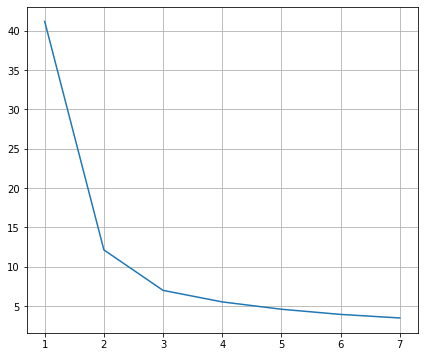

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.plot(k_list, inertias)
plt.xticks(k_list)
plt.grid()
plt.show()

In [9]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coef = silhouette_samples(X_scaled, cluster)
silhouette_coef, silhouette_coef.shape, silhouette_coef.mean()

(array([0.79347482, 0.70973136, 0.76237793, 0.7257315 , 0.78692945,
        0.66218237, 0.75897165, 0.79472986, 0.64055474, 0.73946025,
        0.73540441, 0.78351441, 0.71021692, 0.66415815, 0.61666756,
        0.51541913, 0.67837458, 0.78627881, 0.64045393, 0.73938586,
        0.73093854, 0.74178509, 0.74912282, 0.6942033 , 0.75594482,
        0.69395379, 0.75844053, 0.78218394, 0.7814923 , 0.75396065,
        0.73568776, 0.71236073, 0.66264862, 0.61371799, 0.74185844,
        0.76558606, 0.73110902, 0.77878285, 0.67602776, 0.78997325,
        0.78917531, 0.38986402, 0.72009413, 0.68367323, 0.69302485,
        0.69705284, 0.74154706, 0.7509303 , 0.75022163, 0.78650903,
        0.01476308, 0.22682044, 0.0650627 , 0.55303568, 0.31937392,
        0.58661177, 0.11211165, 0.31387513, 0.32766896, 0.5545476 ,
        0.36363269, 0.50206024, 0.49945109, 0.4818992 , 0.56297865,
        0.19869893, 0.5027267 , 0.57609779, 0.40970738, 0.58933932,
        0.15428253, 0.55664059, 0.3776135 , 0.52

In [10]:
score = silhouette_score(X_scaled, cluster)
score

0.5047687565398589

In [11]:
df['silhouette_coef'] = silhouette_coef
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,y,silhouette_coef
0,5.1,3.5,1.4,0.2,0,0,0.793475
1,4.9,3.0,1.4,0.2,0,0,0.709731
2,4.7,3.2,1.3,0.2,0,0,0.762378
3,4.6,3.1,1.5,0.2,0,0,0.725732
4,5.0,3.6,1.4,0.2,0,0,0.786929


In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,y,silhouette_coef
145,6.7,3.0,5.2,2.3,2,2,0.501976
146,6.3,2.5,5.0,1.9,1,2,0.087458
147,6.5,3.0,5.2,2.0,2,2,0.365267
148,6.2,3.4,5.4,2.3,2,2,0.398200
149,5.9,3.0,5.1,1.8,1,2,0.172734


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 한글 처리
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

Text(1, 4, '찾을 지점')

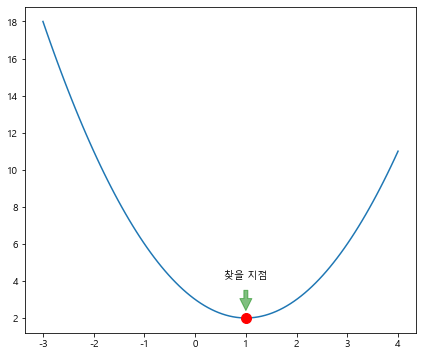

In [16]:
def loss_func(weight):
    return (weight-1)**2 +2

plt.figure(figsize=(7, 6))
weights = np.linspace(-3, 4, 100)
plt.plot(weights, loss_func(weights))
plt.plot(1, 2, 'ro', markersize=10)

plt.annotate('찾을 지점', ha='center', va='bottom',
            xytext=(1, loss_func(1)+2),
            xy=(1, loss_func(1)),
            arrowprops={
                'facecolor' : 'green',
                'edgecolor':'green',
                'shrink' : 0.2, # 화살표 크기 조절
                'alpha':0.5
            })

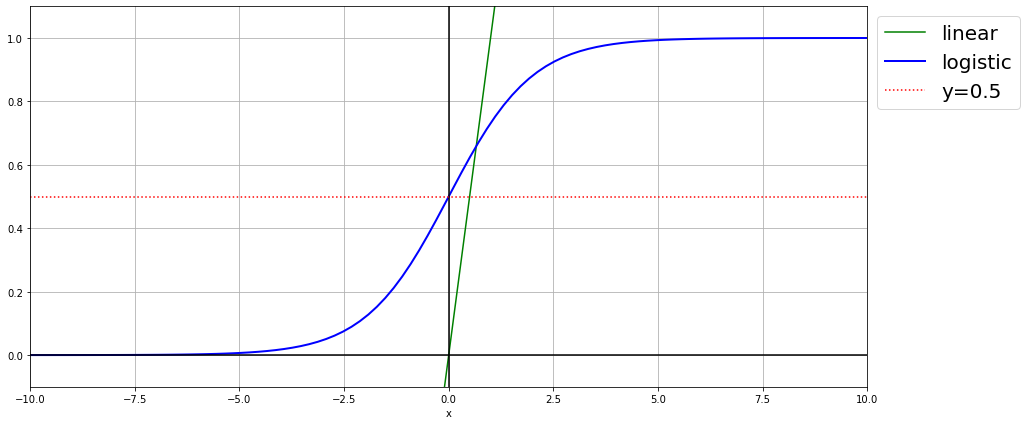

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-xx)) # logistic 함수를 이용해 계산한 값 (sigmoid)

plt.figure(figsize=(15, 7))

plt.plot(xx, xx, color='g', label='linear')
plt.plot(xx, sig, color='b', linewidth=2, label="logistic")

plt.plot([-10, 10], [0, 0], color='k', linestyle='-')
plt.plot([0, 0], [-0.1, 1.1], color='k', linestyle='-')
plt.plot([-10, 10], [0.5, 0.5], color='r', linestyle=':', label='y=0.5')

plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

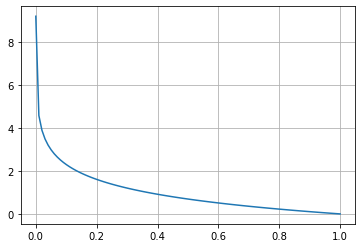

In [2]:
X = np.linspace(0.0001, 1, 100)
y = -np.log(X)

plt.plot(X, y)
plt.grid()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def print_metrics(y, y_pred, title=None):
    if title:
        print(title)
    print(f'정확도: {accuracy_score(y, y_pred)}, \
            재현율(recall): {recall_score(y, y_pred)}, \
            정밀도(precision): {precision_score(y, y_pred)}, \
            F1점수: {f1_score(y, y_pred)}')

In [5]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

정확도: 0.9906103286384976,             재현율(recall): 0.9962546816479401,             정밀도(precision): 0.9888475836431226,             F1점수: 0.9925373134328358
정확도: 0.958041958041958,             재현율(recall): 0.9666666666666667,             정밀도(precision): 0.9666666666666667,             F1점수: 0.9666666666666667


In [6]:
parameter = {
    'C': [0.001, 0.01, 0.1, 1.]
}
gs = GridSearchCV(LogisticRegression(random_state=1),
                parameter, cv=5, scoring='accuracy', n_jobs=-1)

gs.fit(X_train_scaled, y_train)
gs.best_params_

{'C': 0.1}

In [7]:
best_model = gs.best_estimator_
pred_test = best_model.predict(X_test_scaled)
accuracy_score(y_test, pred_test)


0.958041958041958

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

X.shape, y.shape

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

((506, 13), (506,))

In [2]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
df2 = df.join(chas_df)
df2.drop(columns='CHAS', inplace=True)
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [8]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=157)
X_train.shape, X_test.shape

((379, 14), (127, 14))

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)

    print(f'MSE: {mse}, RMSE : {rmse}, R2 : {r2}')
    print('-'*50)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr.intercept_, lr.coef_

(22.62321899736148,
 array([-0.9978984 ,  1.12979329,  0.36695216, -2.21077471,  2.74497338,
        -0.076368  , -3.10162252,  2.99309816, -2.04973449, -2.32404412,
         0.74107244, -3.88214836, -0.35399572,  0.35399572]))

In [15]:
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.997898
ZN         1.129793
INDUS      0.366952
NOX       -2.210775
RM         2.744973
AGE       -0.076368
DIS       -3.101623
RAD        2.993098
TAX       -2.049734
PTRATIO   -2.324044
B          0.741072
LSTAT     -3.882148
CHAS_0    -0.353996
CHAS_1     0.353996
dtype: float64

In [16]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='LinearRegression Train')
print_regression_metrics(y_test, pred_test, title='LinearRegression Test')

LinearRegression Train
MSE: 22.245118316611595, RMSE : 4.716473080238198, R2 : 0.7461026267994638
--------------------------------------------------
LinearRegression Test
MSE: 21.607750530858414, RMSE : 4.648413765023335, R2 : 0.7110781557728248
--------------------------------------------------


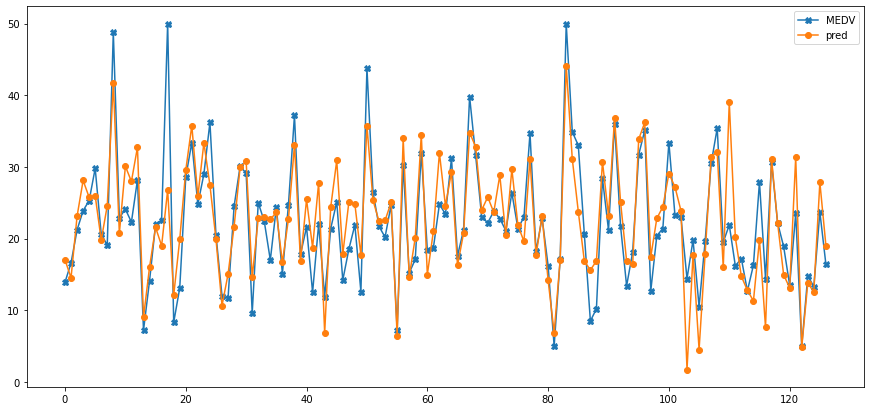

In [18]:
plt.figure(figsize=(15, 7))
plt.plot(range(len(y_test)), y_test, label='MEDV', marker='X')
plt.plot(range(len(y_test)), pred_test, label='pred', marker='o')
plt.legend()


In [23]:
np.random.seed(157)

m = 100
X = 6*np.random.rand(m, 1) -3
y = X**2 + X + 2 + np.random.normal(0, 1, size=(m, 1))
y = y.flatten()
X.shape, y.shape
# y[:5]

((100, 1), (100,))

In [24]:
df = pd.DataFrame({'X': X.flatten(), 'y': y})
df.head()

,X,y
0,1.784412,7.787032
1,0.511323,2.504881
2,-1.439820,3.448450
3,-1.446201,3.981903
4,1.299191,2.869810


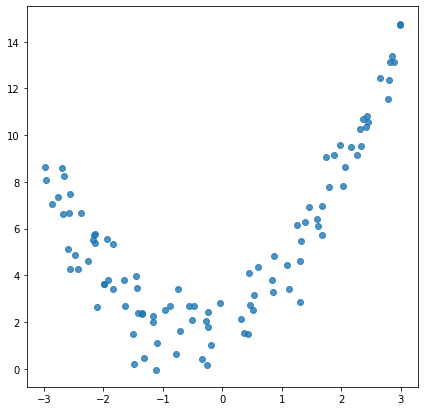

In [27]:
plt.figure(figsize=(7, 7))
plt.scatter(X, y, alpha=0.8)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([1.0354851]), 5.563715406742655)

In [29]:
pred = lr.predict(X)
print_regression_metrics(y, pred)

MSE: 9.183082640816057, RMSE : 3.030360150347819, R2 : 0.2827948246288676
--------------------------------------------------


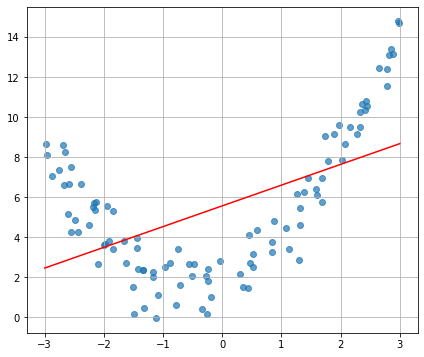

In [30]:
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
pred_new = lr.predict(X_new)

plt.figure(figsize=(7, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, pred_new, color='red')
plt.grid()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree=2, include_bias=True)

X_poly = poly_f.fit_transform(X)
X.shape, X_poly.shape

((100, 1), (100, 3))

In [32]:
X_poly[:5]

array([[ 1.        ,  1.78441239,  3.18412757],
       [ 1.        ,  0.51132343,  0.26145165],
       [ 1.        , -1.43981972,  2.07308083],
       [ 1.        , -1.44620142,  2.09149854],
       [ 1.        ,  1.29919071,  1.68789649]])

In [33]:
poly_f.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [34]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

lr2.coef_, lr2.intercept_

(array([0.        , 1.04148258, 1.05192596]), 1.9965948005979155)

In [35]:
pred2 = lr2.predict(X_poly)
print_regression_metrics(y, pred2, title='PolylinearRegression')
print_regression_metrics(y, pred, title='LinearRegression')

PolylinearRegression
MSE: 0.9818119442906513, RMSE : 0.990864241099986, R2 : 0.9233198006346294
--------------------------------------------------
LinearRegression
MSE: 9.183082640816057, RMSE : 3.030360150347819, R2 : 0.2827948246288676
--------------------------------------------------


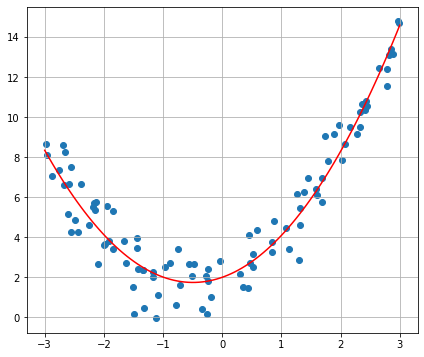

In [36]:
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
pred_new2 = lr2.predict(X_new_poly)

plt.figure(figsize=(7, 6))
plt.scatter(X, y)
plt.plot(X_new, pred_new2, color='r')
plt.grid()

In [37]:
pnf = PolynomialFeatures(degree=25, include_bias=False)
X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

((100, 25), (100, 1))

In [39]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

lr.coef_.shape

(25,)

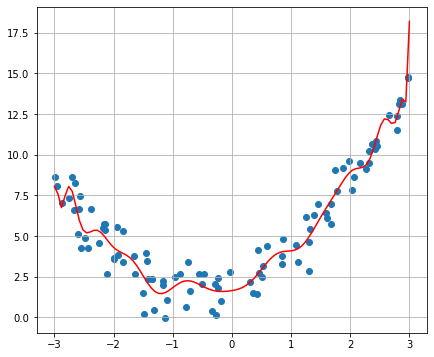

In [41]:
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = pnf.transform(X_new)
pred_new100 = lr.predict(X_new_poly)

plt.figure(figsize=(7, 6))
plt.scatter(X, y)
plt.plot(X_new, pred_new100, color='r')
plt.grid()

In [42]:
data = np.arange(12).reshape(4, 3)
print(data.shape)
data

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [43]:
pnf2 = PolynomialFeatures(degree=2)
data_poly = pnf2.fit_transform(data)
data_poly.shape

(4, 10)

In [45]:
pnf2.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [46]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names_out())

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,1.0,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [47]:
pnf3 = PolynomialFeatures(degree=5)
data_poly2 = pnf3.fit_transform(data)
data_poly2.shape

(4, 56)

In [48]:
pnf3.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [49]:
pnf4 = PolynomialFeatures(interaction_only=True)
data_poly4 = pnf4.fit_transform(data)
data_poly4.shape

(4, 7)

In [50]:
pnf4.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0 x1', 'x0 x2', 'x1 x2'], dtype=object)

In [56]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

X_train_scaled_poly.shape, X_test_scaled_poly.shape

((379, 119), (127, 119))

In [57]:
pnf.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4',
       'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12',
       'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7',
       'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10',
       'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2',
       'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12',
       'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
       'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11',
       'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11

In [58]:
lr3 = LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)

pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3 = lr3.predict(X_test_scaled_poly)

print_regression_metrics(y_train, pred_train, title='Train')
print_regression_metrics(y_test, pred_test, title='Test')

print_regression_metrics(y_train, pred_train3, title='Train poly')
print_regression_metrics(y_test, pred_test3, title='Test poly')

Train
MSE: 22.245118316611595, RMSE : 4.716473080238198, R2 : 0.7461026267994638
--------------------------------------------------
Test
MSE: 21.607750530858414, RMSE : 4.648413765023335, R2 : 0.7110781557728248
--------------------------------------------------
Train poly
MSE: 5.842167846200335, RMSE : 2.417057683672513, R2 : 0.9333197041780069
--------------------------------------------------
Test poly
MSE: 3.497946088890619e+24, RMSE : 1870279681996.952, R2 : -4.6771783743347504e+22
--------------------------------------------------


In [18]:
from util import print_metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=157, test_size=0.2)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [13]:
gb = GradientBoostingClassifier(random_state=157)

gb.fit(X_train, y_train)
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

print_metrics(y_train, pred_train, title='train')
print_metrics(y_test, pred_test, title='test')

train
정확도: 1.0, recall: 1.0, Precision: 1.0, f1점수: 1.0
test
정확도: 0.956140350877193, recall: 0.9861111111111112, Precision: 0.9466666666666667, f1점수: 0.9659863945578231


In [14]:
gb = GradientBoostingClassifier(random_state=157, max_depth=1)

gb.fit(X_train, y_train)
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

print_metrics(y_train, pred_train, title='train')
print_metrics(y_test, pred_test, title='test')

train
정확도: 0.9912087912087912, recall: 1.0, Precision: 0.986159169550173, f1점수: 0.9930313588850175
test
정확도: 0.956140350877193, recall: 0.9861111111111112, Precision: 0.9466666666666667, f1점수: 0.9659863945578231


In [15]:
gb = GradientBoostingClassifier(random_state=157, max_depth=1,
                                learning_rate=0.001, n_estimators=1000)

gb.fit(X_train, y_train)
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

print_metrics(y_train, pred_train, title='train')
print_metrics(y_test, pred_test, title='test')

train
정확도: 0.9406593406593406, recall: 0.9894736842105263, Precision: 0.9215686274509803, f1점수: 0.9543147208121827
test
정확도: 0.9210526315789473, recall: 1.0, Precision: 0.8888888888888888, f1점수: 0.9411764705882353


In [16]:
gb.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.26344023, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03713345, 0.        , 0.33063152, 0.13140424, 0.        ,
       0.        , 0.        , 0.23739055, 0.        , 0.        ])

In [19]:
import pandas as pd

fi = pd.Series(gb.feature_importances_, index=data['feature_names'])
fi.sort_values(ascending=False)

worst perimeter            0.330632
mean concave points        0.263440
worst concave points       0.237391
worst area                 0.131404
worst radius               0.037133
mean radius                0.000000
concavity error            0.000000
worst symmetry             0.000000
worst concavity            0.000000
worst compactness          0.000000
worst smoothness           0.000000
worst texture              0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
compactness error          0.000000
mean texture               0.000000
smoothness error           0.000000
area error                 0.000000
perimeter error            0.000000
texture error              0.000000
radius error               0.000000
mean fractal dimension     0.000000
mean symmetry              0.000000
mean concavity             0.000000
mean compactness           0.000000
mean smoothness            0.000000
mean area                  0

<AxesSubplot:>

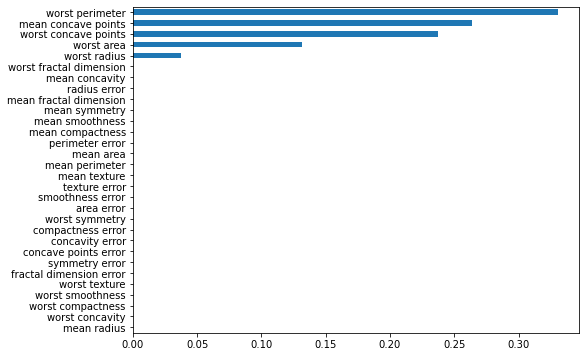

In [20]:
fi.sort_values().plot(kind='barh', figsize=(8, 6))

In [52]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators': range(500, 1001, 100),
    'learning_rate': [0.001, 0.05, 0.01, 0.1, 0.5],
    'max_depth': [1, 2, 3],
    'subsample': [.5, .7, .9, 1]
}

rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=157),
                        param, cv=4, n_iter=60, scoring='accuracy',
                        n_jobs=-1)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=157),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.05, 0.01,
                                                          0.1, 0.5],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': range(500, 1001, 100),
                                        'subsample': [0.5, 0.7, 0.9, 1]},
                   scoring='accuracy')

In [53]:
result_df = pd.DataFrame(rs.cv_results_)
result_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.480535,0.062454,0.001156,2.756466e-04,0.5,900,3,0.5,"{'subsample': 0.5, 'n_estimators': 900, 'max_d...",0.981308,0.981308,0.981132,0.971698,0.978862,0.004137,1
43,0.311728,0.030668,0.000997,1.685874e-07,0.5,500,3,0.5,"{'subsample': 0.5, 'n_estimators': 500, 'max_d...",0.981308,0.981308,0.981132,0.971698,0.978862,0.004137,1
20,0.419982,0.056172,0.000748,4.317769e-04,0.5,700,3,0.5,"{'subsample': 0.5, 'n_estimators': 700, 'max_d...",0.981308,0.981308,0.981132,0.971698,0.978862,0.004137,1
36,0.456645,0.005706,0.000937,1.125109e-04,0.5,1000,1,0.5,"{'subsample': 0.5, 'n_estimators': 1000, 'max_...",0.990654,0.981308,0.981132,0.962264,0.978840,0.010316,4
32,0.301486,0.007178,0.000995,4.110560e-06,0.5,500,1,0.5,"{'subsample': 0.5, 'n_estimators': 500, 'max_d...",0.990654,0.971963,0.981132,0.962264,0.976503,0.010548,5


In [54]:
rs.best_params_

{'subsample': 0.5, 'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.5}

In [55]:
rs.best_score_

0.978861752777288

In [57]:
best_model = rs.best_estimator_
pred_test = best_model.predict(X_test)

print_metrics(y_test, pred_test)

accuracy_score: 0.9440559440559441


In [58]:
import numpy as np

fi = pd.Series(best_model.feature_importances_, index=data['feature_names'])
fi.sort_values(ascending=False)

worst concave points       0.433601
worst perimeter            0.185450
texture error              0.062065
mean concave points        0.062046
mean texture               0.044016
worst area                 0.038604
worst texture              0.031685
worst smoothness           0.023211
radius error               0.019416
worst concavity            0.012176
mean smoothness            0.009106
mean compactness           0.008961
area error                 0.008755
worst symmetry             0.007502
concavity error            0.007340
worst radius               0.006669
fractal dimension error    0.005744
smoothness error           0.005719
compactness error          0.005484
mean concavity             0.004953
mean perimeter             0.003603
mean radius                0.003529
worst compactness          0.002957
mean area                  0.002831
perimeter error            0.001518
mean symmetry              0.001108
mean fractal dimension     0.000716
worst fractal dimension    0

<AxesSubplot:>

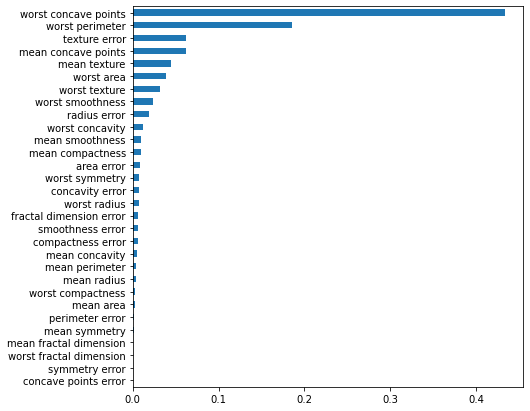

In [59]:
fi.sort_values().plot(kind='barh', figsize=(7, 7))

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=2, random_state=157)
xgb.fit(X_train, y_train)

[14:54:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=157,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
from util import print_metrics
pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

print_metrics(y_train, pred_train, 'xgb train')
print_metrics(y_test, pred_test, 'xgb test')

xgb train
정확도: 0.9929577464788732, recall: 1.0, Precision: 0.9888888888888889, f1점수: 0.9944134078212291
xgb test
정확도: 0.958041958041958, recall: 0.9777777777777777, Precision: 0.9565217391304348, f1점수: 0.967032967032967


<AxesSubplot:>

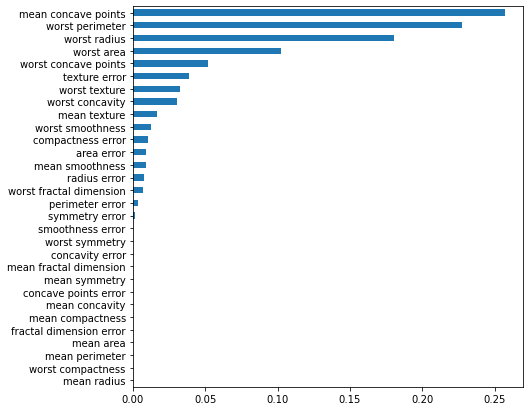

In [64]:
pd.Series(xgb.feature_importances_, index=data.feature_names).sort_values().plot(kind='barh', figsize=(7, 7))

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

In [23]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=157)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

def print_metrics(y, pred, title=None):
    acc = accuracy_score(y, pred)
    if title:
        print(title)
    print('accuracy_score:', acc)

In [25]:
svc = SVC(random_state=157)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=157)

svc.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

pred_train_svc = svc.predict(X_train_scaled)
pred_train_knn = knn.predict(X_train_scaled)
pred_train_rf = rf.predict(X_train)

pred_test_svc = svc.predict(X_test_scaled)
pred_test_knn = knn.predict(X_test_scaled)
pred_test_rf = rf.predict(X_test)

print_metrics(y_train, pred_train_svc, 'train SVC')
print_metrics(y_train, pred_train_knn, 'train KNN')
print_metrics(y_train, pred_train_rf, 'train_rf')

print_metrics(y_test, pred_test_svc, 'test SVC')
print_metrics(y_test, pred_test_knn, 'test KNN')
print_metrics(y_test, pred_test_rf, 'test_rf')

train SVC
accuracy_score: 0.9882629107981221
train KNN
accuracy_score: 0.9812206572769953
train_rf
accuracy_score: 0.9929577464788732
test SVC
accuracy_score: 0.972027972027972
test KNN
accuracy_score: 0.972027972027972
test_rf
accuracy_score: 0.951048951048951


In [26]:
estimators = [
    ('svc', svc),
    ('knn', knn),
    ('rf', rf)
]

voting = VotingClassifier(estimators)
voting.fit(X_train_scaled, y_train)

pred_train = voting.predict(X_train_scaled)
pred_test = voting.predict(X_test_scaled)

print_metrics(y_train, pred_train, 'train')
print_metrics(y_test, pred_test, 'test')

train
accuracy_score: 0.9906103286384976
test
accuracy_score: 0.965034965034965


In [27]:
estimators = [
    ('svc', SVC(random_state=157, probability=True)),
    ('knn', knn),
    ('rf', rf)
]

voting = VotingClassifier(estimators, voting='soft')
voting.fit(X_train_scaled, y_train)

pred_train = voting.predict(X_train_scaled)
pred_test = voting.predict(X_test_scaled)

print_metrics(y_train, pred_train, 'train')
print_metrics(y_test, pred_test, 'test')

train
accuracy_score: 0.9906103286384976
test
accuracy_score: 0.965034965034965


In [28]:
from sklearn.pipeline import Pipeline, make_pipeline

order_knn = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

order_svc = [
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=157, probability=True))
]

knn_pl = Pipeline(order_knn)
svc_pl = Pipeline(order_svc)

rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=157)

estimators = [
    ('knn', knn_pl),
    ('svc', svc_pl),
    ('rf', rf)
]

voting = VotingClassifier(estimators, voting='soft')
voting.fit(X_train, y_train)

print_metrics(y_train, voting.predict(X_train))
print_metrics(y_test, voting.predict(X_test))


accuracy_score: 0.9906103286384976
accuracy_score: 0.951048951048951


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [30]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [31]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,C,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,B,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1


In [32]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [33]:
wine['color'].value_counts()/len(wine)

0    0.753886
1    0.246114
Name: color, dtype: float64

In [34]:
# X = wine.drop(labels='color', axis=1)
X = wine.iloc[:, :-1]
y = wine['color']
X.shape, y.shape

((6497, 12), (6497,))

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()

X['quality'] = encoder.fit_transform(X['quality'])

print(encoder.classes_)

['A' 'B' 'C']


In [36]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=157)

In [38]:
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

proba_train = tree.predict_proba(X_train)[:, 1]
proba_test = tree.predict_proba(X_test)[:, 1]

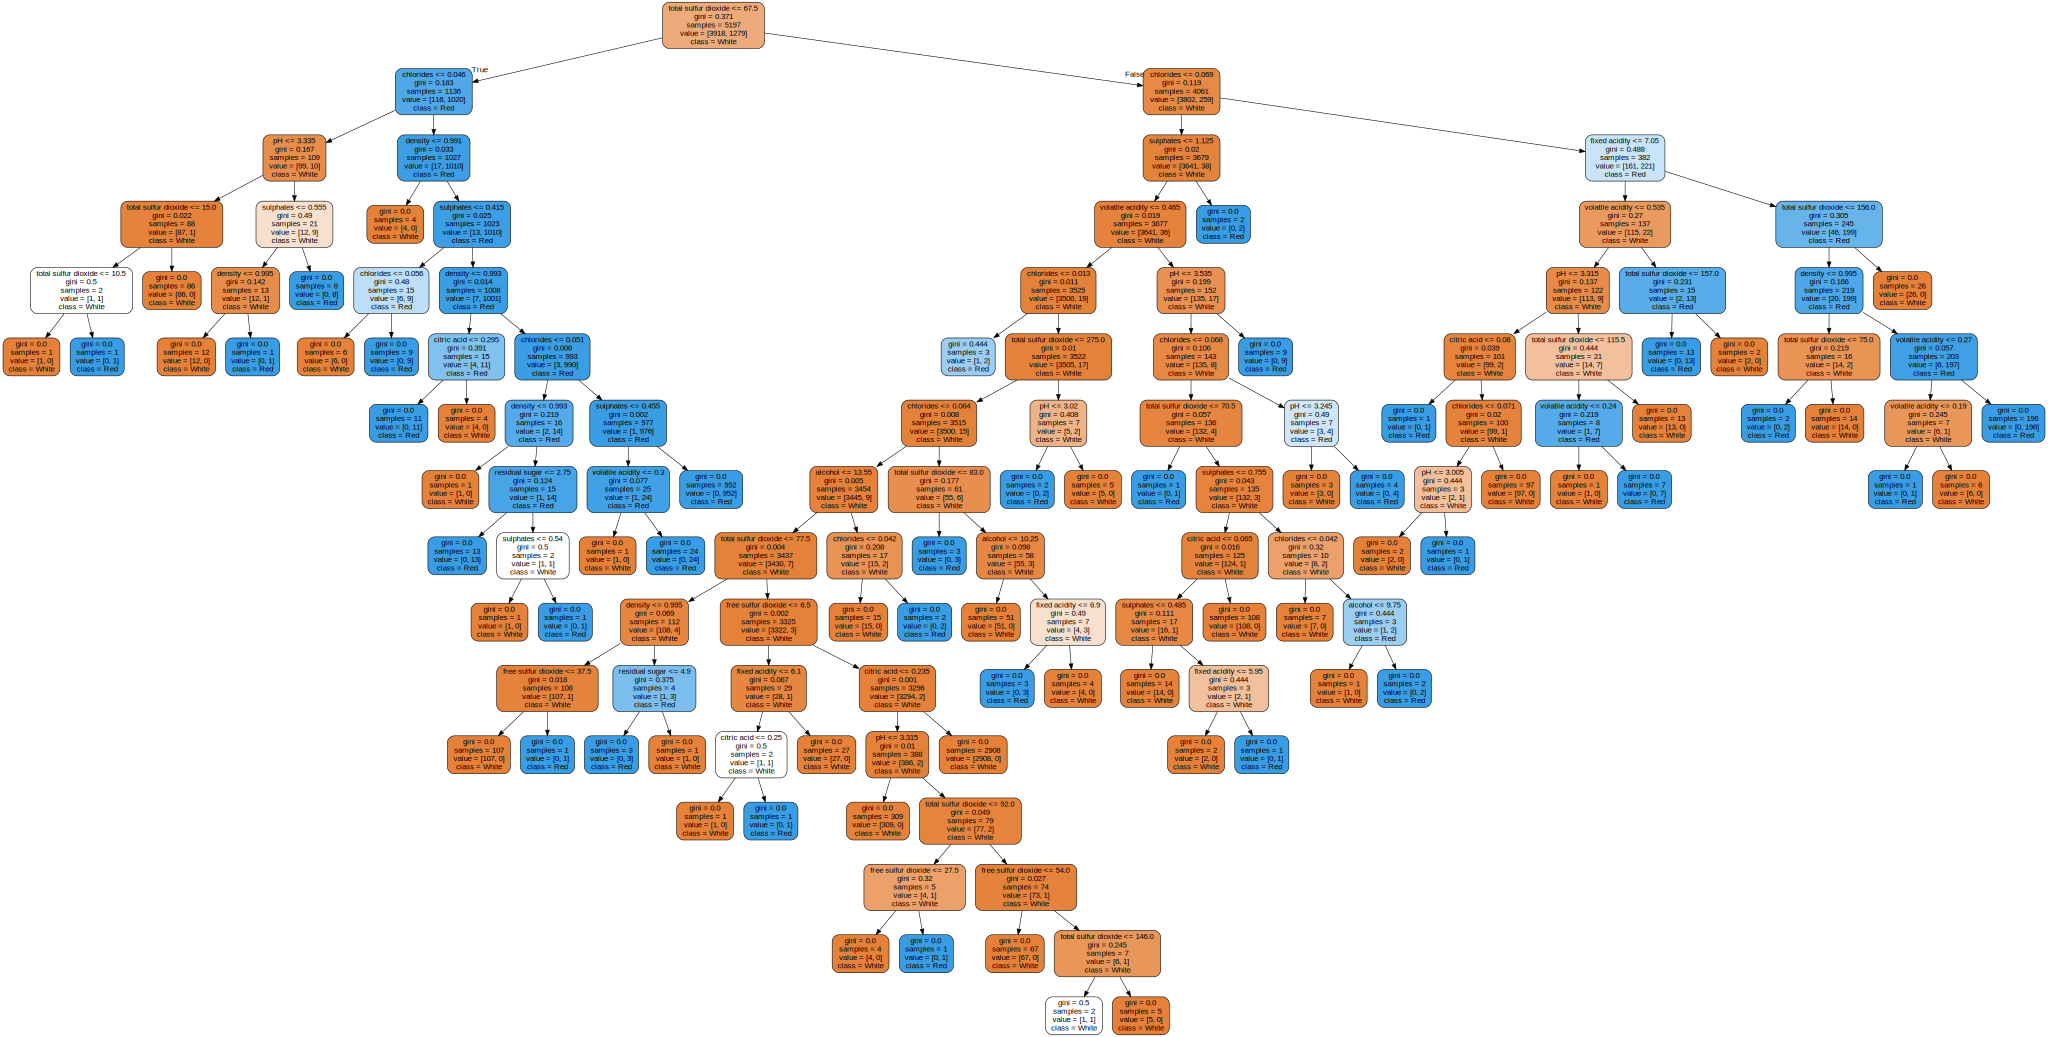

In [40]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(tree, out_file=None,
                                feature_names=X.columns,
                                class_names=['White', 'Red'],
                                rounded=True, filled=True))

graph

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix(y_train, pred_train), confusion_matrix(y_test, pred_test)

(array([[3917,    1],
        [   1, 1278]], dtype=int64),
 array([[969,  11],
        [ 11, 309]], dtype=int64))

In [42]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9996151625938041, 0.9830769230769231)

In [43]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, RocCurveDisplay, roc_curve, auc

roc_auc_score(y_train, proba_train), roc_auc_score(y_test, proba_test)

(0.9999995011097316, 0.9772002551020408)

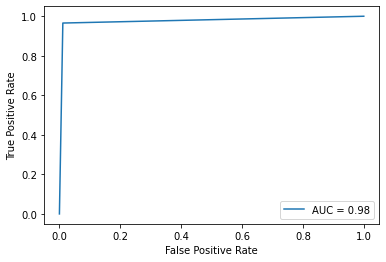

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


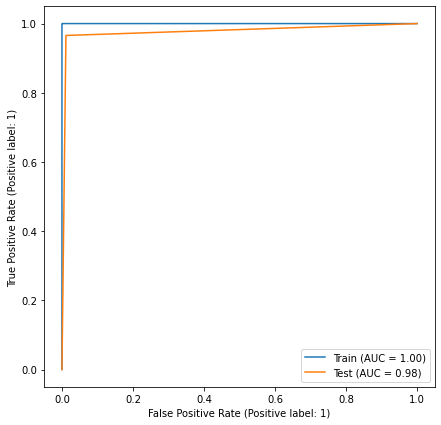

In [45]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))
plot_roc_curve(tree, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(tree, X_test, y_test, ax=ax, name='Test')

In [46]:
fi = tree.feature_importances_
fi.shape

(12,)

In [47]:
fi_s = pd.Series(fi, index=X.columns)
fi_s.sort_values()

quality                 0.000000
residual sugar          0.001229
free sulfur dioxide     0.002028
alcohol                 0.002101
citric acid             0.004635
sulphates               0.009987
pH                      0.016672
volatile acidity        0.018386
density                 0.020111
fixed acidity           0.041700
chlorides               0.208465
total sulfur dioxide    0.674687
dtype: float64

<AxesSubplot:>

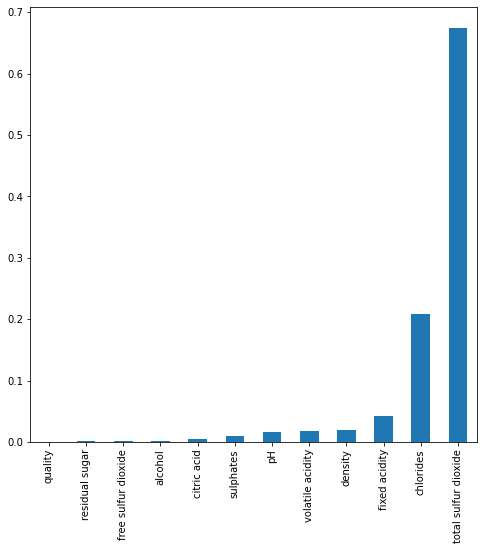

In [48]:
fi_s.sort_values().plot(kind='bar', figsize=(8, 8))

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=157)

tree = DecisionTreeClassifier(max_depth=3, random_state=157)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.9765258215962441
0.9230769230769231


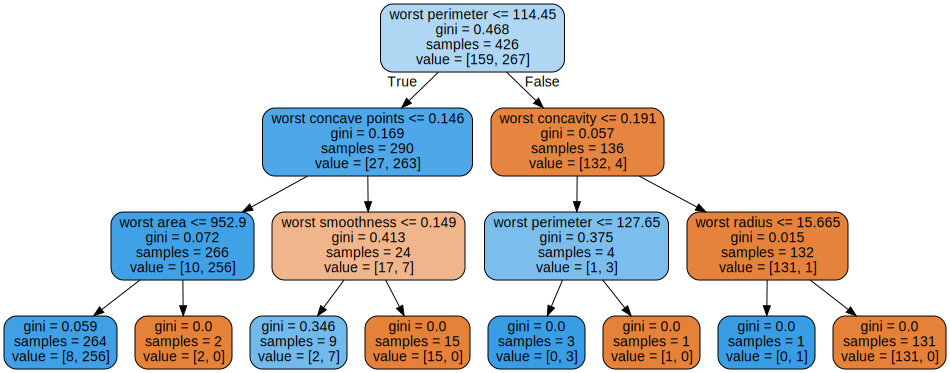

In [50]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, rounded=True, filled=True))
graph

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

max_depth_candidates = range(1, 6)
train_acc_list = []
test_acc_list = []

for depth in max_depth_candidates:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=157)
    tree.fit(X_train, y_train)

    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)

    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

result_df = pd.DataFrame({
    'Train acc' : train_acc_list,
    'Test acc' : test_acc_list
}, index=max_depth_candidates)

result_df.rename_axis(index='max_depth', columns='dataset', inplace=True)
result_df

dataset,Train acc,Test acc
max_depth,,
1,0.927230,0.895105
2,0.955399,0.923077
3,0.976526,0.923077
4,0.981221,0.930070
5,0.985915,0.923077


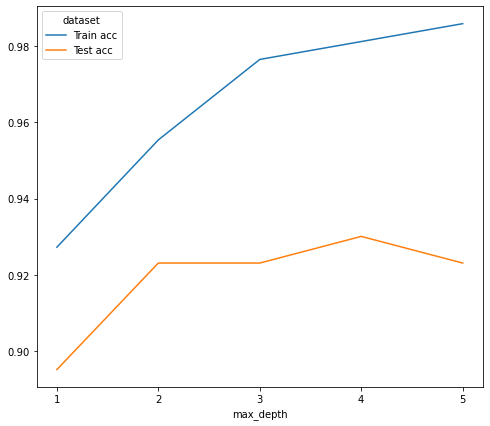

In [7]:
import matplotlib.pyplot as plt

result_df.plot(figsize=(8, 7))
plt.xticks(range(1, 6))
plt.show()

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
tree = DecisionTreeClassifier(random_state=157)

param_grid = {'max_depth':[None, 1, 2, 3, 4, 5],
                'max_leaf_nodes': [3, 5, 7, 9]}

grid_search = GridSearchCV(tree, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=157),
             n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

In [13]:
grid_search.cv_results_

{'mean_fit_time': array([0.00279288, 0.00598392, 0.0047873 , 0.00418887, 0.00179543,
        0.00179501, 0.00139675, 0.00159588, 0.00199451, 0.0021944 ,
        0.0025939 , 0.0021934 , 0.00199451, 0.0025929 , 0.00299201,
        0.00259314, 0.00199494, 0.00259256, 0.00259304, 0.00279284,
        0.00199485, 0.0021944 , 0.00279298, 0.0025929 ]),
 'std_fit_time': array([3.99017334e-04, 4.50405149e-03, 3.99280374e-04, 3.99542125e-04,
        3.98588822e-04, 3.98850680e-04, 4.90096414e-04, 4.88831877e-04,
        2.43140197e-07, 3.99112844e-04, 4.88830901e-04, 3.99137408e-04,
        1.90734863e-07, 4.88791920e-04, 5.35248383e-07, 4.88598020e-04,
        6.67572021e-07, 4.88324764e-04, 4.88324904e-04, 3.98635893e-04,
        6.21719590e-07, 3.99351191e-04, 3.98826656e-04, 4.88694596e-04]),
 'mean_score_time': array([0.0011972 , 0.00239353, 0.00059834, 0.00039892, 0.00019937,
        0.00039902, 0.00079732, 0.00039868, 0.00059848, 0.00019989,
        0.        , 0.00019937, 0.0001996 , 0.  

In [14]:
import pandas as pd
df = pd.DataFrame(grid_search.cv_results_)
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [15]:
df[df.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,"{'max_depth': None, 'max_leaf_nodes': 5}",0.94186,0.964706,0.905882,0.929412,0.964706,0.941313,0.022324,1
21,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.94186,0.964706,0.905882,0.929412,0.964706,0.941313,0.022324,1
17,"{'max_depth': 4, 'max_leaf_nodes': 5}",0.94186,0.964706,0.905882,0.929412,0.964706,0.941313,0.022324,1
13,"{'max_depth': 3, 'max_leaf_nodes': 5}",0.94186,0.964706,0.905882,0.929412,0.964706,0.941313,0.022324,1
2,"{'max_depth': None, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.917647,0.964706,0.938960,0.030144,5


In [16]:
print("가장 좋은 평가점수: ", grid_search.best_score_)
print("가장 좋은 파라미터 조합:", grid_search.best_params_)

가장 좋은 평가점수:  0.941313269493844
가장 좋은 파라미터 조합: {'max_depth': None, 'max_leaf_nodes': 5}


In [17]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_leaf_nodes=5, random_state=157)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, best_model.predict(X_test))

0.9020979020979021

In [19]:
tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[None, 1, 2, 3, 4, 5],
              'max_leaf_nodes':[3,5,7,9]
             }
grid_search = GridSearchCV(tree, 
                           param_grid=param_grid,
                           scoring=['accuracy', 'recall', 'precision','roc_auc', 'f1'], 
                           refit='accuracy',
                           cv=5, 
                           n_jobs=-1)
# refit : best parameter를 선택할 평가지표 설정
#       여기서 지정한 평가지표가 가장 좋은 파라미터로 모델을 재학습

In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             refit='accuracy',
             scoring=['accuracy', 'recall', 'precision', 'roc_auc', 'f1'])

In [21]:
df2 = pd.DataFrame(grid_search.cv_results_)
df2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall',
       'split1_test_recall', 'split2_test_recall', 'split3_test_recall',
       'split4_test_recall', 'mean_test_recall', 'std_test_recall',
       'rank_test_recall', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_roc_auc', 'split1_test_roc_auc',
       'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc',
       'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', '

In [22]:
df2[df2.columns[6:]].sort_values('rank_test_accuracy').head()

,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_recall,...,std_test_roc_auc,rank_test_roc_auc,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
2,"{'max_depth': None, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.941176,0.964706,0.943666,0.028225,1,0.962963,...,0.034893,4,0.954128,0.981481,0.915888,0.953271,0.971429,0.955239,0.022380,1
18,"{'max_depth': 4, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.941176,0.964706,0.943666,0.028225,1,0.962963,...,0.034893,4,0.954128,0.981481,0.915888,0.953271,0.971429,0.955239,0.022380,1
22,"{'max_depth': 5, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.941176,0.964706,0.943666,0.028225,1,0.962963,...,0.034893,4,0.954128,0.981481,0.915888,0.953271,0.971429,0.955239,0.022380,1
23,"{'max_depth': 5, 'max_leaf_nodes': 9}",0.94186,0.976471,0.882353,0.929412,0.952941,0.936607,0.031237,4,0.962963,...,0.043003,19,0.954128,0.981481,0.907407,0.943396,0.961538,0.949590,0.024487,4
1,"{'max_depth': None, 'max_leaf_nodes': 5}",0.94186,0.964706,0.905882,0.929412,0.941176,0.936607,0.019151,4,0.962963,...,0.024735,9,0.954128,0.971963,0.924528,0.943396,0.953271,0.949457,0.015499,6


In [23]:
grid_search.best_score_, grid_search.best_params_

(0.9436662106703146, {'max_depth': None, 'max_leaf_nodes': 7})

In [24]:
# refit 평가지표가 가장 좋은 파라미터로 재학습한 모델
best_model = grid_search.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.9370629370629371

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits() # 8*8 = 64 pixel => flatten data로 제공
digits.keys()

X = digits.data
y = digits.target

y = np.where(y==9, 1, 0) # 조건이 true = 1 변환, false = 0 변환

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=157)
print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


In [3]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3,
                                random_state=157)

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            random_state=157)

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

predict_train_tree = tree.predict(X_train)
predict_test_tree = tree.predict(X_test)

predict_train_rf = rf.predict(X_train)
predict_test_rf = rf.predict(X_test)

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
def display_cm(y, pred, title):
    """
    cm 시각화 함수
    [parameter]
    y : target (ndarray)
    pred : predict (ndarray)
    title : (str)
    """
    cm = confusion_matrix(y, pred)
    plt.figure(figsize=(7, 7))
    ax = plt.gca()

    disp = ConfusionMatrixDisplay(cm, display_labels=['not 9', '9'])
    disp.plot(cmap='Reds', ax=ax)
    plt.title(f'{title} Confusion Matrix')

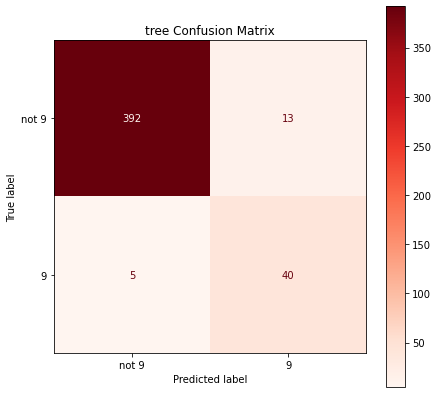

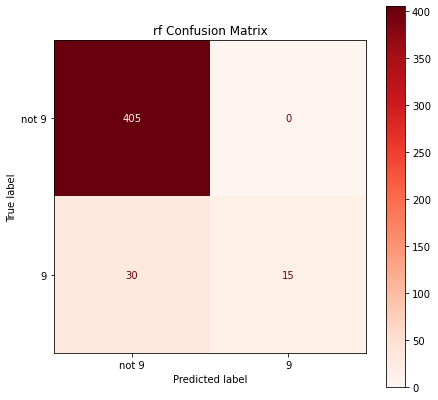

In [7]:
display_cm(y_test, predict_test_tree, 'tree')
display_cm(y_test, predict_test_rf, 'rf')

In [8]:
def print_metrics_score(y, pred, title):
    """
    acc, recall, precision, f1 출력
    [parameter]
    y : target (ndarray)
    pred : predict (ndarray)
    title : (str)
    """
    print(title)
    print('accuracy_score', accuracy_score(y, pred))
    print('recall_score', recall_score(y, pred))
    print('precision_score', precision_score(y, pred))
    print('f1_score', f1_score(y, pred))
    print()

In [9]:
print_metrics_score(y_test, predict_test_tree, 'tree model')
print_metrics_score(y_test, predict_test_rf, 'rf model')

tree model
accuracy_score 0.96
recall_score 0.8888888888888888
precision_score 0.7547169811320755
f1_score 0.8163265306122449

rf model
accuracy_score 0.9333333333333333
recall_score 0.3333333333333333
precision_score 1.0
f1_score 0.5



In [11]:
from sklearn.metrics import classification_report

result = classification_report(y_test,
                                predict_test_rf,
                                target_names=['pos (not 9)', 'pos (9)'])

print(result)

              precision    recall  f1-score   support

 pos (not 9)       0.93      1.00      0.96       405
     pos (9)       1.00      0.33      0.50        45

    accuracy                           0.93       450
   macro avg       0.97      0.67      0.73       450
weighted avg       0.94      0.93      0.92       450



In [13]:
tree.predict_proba(X_test)[:5]

array([[0.98676957, 0.01323043],
       [0.98676957, 0.01323043],
       [0.98676957, 0.01323043],
       [0.25409836, 0.74590164],
       [0.98676957, 0.01323043]])

In [14]:
tree.predict(X_test)[:5]

array([0, 0, 0, 1, 0])

In [15]:
from sklearn.metrics import precision_recall_curve

pos_proba = tree.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)

print(precisions.shape, recalls.shape, thresholds.shape)

(9,) (9,) (8,)


In [17]:
thresholds = np.append(thresholds, 1)

print(thresholds)

[0.00671141 0.01323043 0.03571429 0.03846154 0.17021277 0.3125
 0.57692308 0.74590164 1.        ]


In [18]:
import pandas as pd

pd.DataFrame({
    'thresholds' : thresholds,
    'precision' : precisions,
    'recall' : recalls
})

,thresholds,precision,recall
0,0.006711,0.100000,1.000000
1,0.013230,0.110000,0.977778
2,0.035714,0.439560,0.888889
3,0.038462,0.493827,0.888889
4,0.170213,0.563380,0.888889
5,0.312500,0.689655,0.888889
6,0.576923,0.754717,0.888889
7,0.745902,0.808511,0.844444
8,1.000000,1.000000,0.000000


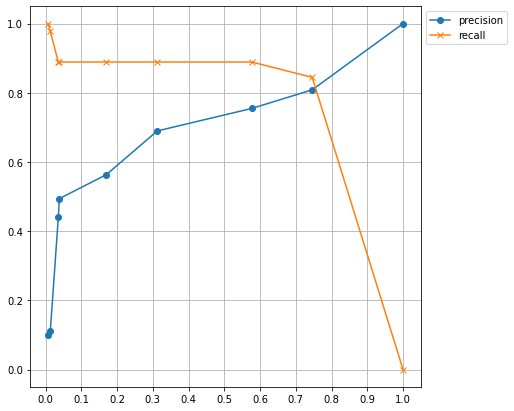

In [20]:
plt.figure(figsize=(7, 7))

plt.plot(thresholds, precisions, marker='o', label='precision')
plt.plot(thresholds, recalls, marker='x', label='recall')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [21]:
from sklearn.preprocessing import Binarizer

exam = [np.arange(0.1, 1.0, 0.1)]

binarizer = Binarizer(threshold=0.3)
binarizer.fit_transform(exam)

array([[0., 0., 1., 1., 1., 1., 1., 1., 1.]])

In [26]:
exam = np.array(exam)
th = 0.6
np.where(exam <= th, 0, 1)

array([[0, 0, 0, 0, 0, 0, 1, 1, 1]])

In [30]:
binarizer1 = Binarizer(threshold=0.1)
binarizer2 = Binarizer(threshold=0.4)
pred_proba = tree.predict_proba(X_test)

pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:, 1]
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:, 1]

print_metrics_score(y_test, pred_test_tree2, 'th=0.1')
print_metrics_score(y_test, pred_test_tree3, 'th=0.4')

th=0.1
accuracy_score 0.92
recall_score 0.8888888888888888
precision_score 0.5633802816901409
f1_score 0.689655172413793

th=0.4
accuracy_score 0.96
recall_score 0.8888888888888888
precision_score 0.7547169811320755
f1_score 0.8163265306122449

